# The Taxi Problem
## Georga Leisemann 2020
## SIT215 Project
### References:
https://gym.openai.com/envs/Taxi-v3/</br>
https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/


In [1]:
#imports
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#initialise and render the taxi-v3 environement
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



# Random Policy Implementation

In [3]:
total_epochs, total_penalties = 0, 0
episodes = 100
rand_ep_reward_list = []
ep_reward = 0

#loop through 100 episodes (100 different passengers)
for _ in range(episodes):
    #set current state to starting environment
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    #done = have successfully dropped off passenger/completed episode
    done = False

    #while episode incomplete
    while not done:
        #render environment
        env.render()
        #select a random action
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        ep_reward = ep_reward + reward

        #set penalty based on reward value for action
        if reward == -10:
            penalties += 1

        #increment episode
        epochs += 1

    #once 100 episode are complete, sum total penalties and episodes
    total_penalties += penalties
    total_epochs += epochs
    rand_ep_reward_list.append(ep_reward)
    ep_reward = 0

#store metrics
rand_avg_time = total_epochs / episodes
rand_avg_pen = total_penalties / episodes

#print evaluation of agents performance
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {rand_avg_time}")
print(f"Average penalties per episode: {rand_avg_pen}")

Results after 100 episodes:
Average timesteps per episode: 3165.81
Average penalties per episode: 1027.12


# Q-Learning Training

In [4]:
%%time
#initialise the q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
ep_reward = 0
q_ep_reward_list = []

#train over 10,000 episodes
for i in range(1, 10001):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    
    done = False
    
    #while 10,000 episodes are not complete
    while not done:
        #decide on exploration or exploitation based on comparison between random number (0-1) and epsilon
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        ep_reward = ep_reward + reward
    
        #execute action
        next_state, reward, done, info = env.step(action) 
        
        #get old q_value
        old_value = q_table[state, action]
        #obtain the maximum reward for next state
        next_max = np.max(q_table[next_state])
        #obtain new q value after action was taken
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        #update q_table with new q value
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    q_ep_reward_list.append(ep_reward)
    ep_reward = 0

    #live update on current episode    
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 10000
Training finished.

CPU times: user 9.97 s, sys: 535 ms, total: 10.5 s
Wall time: 13.5 s


# Q-Learning Implementation

In [5]:
total_epochs, total_penalties = 0, 0
episodes = 100
q_run_ep_reward_list = []
ep_reward = 0

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        #render environment
        env.render()
        #choose action based on best q value in q_table
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        ep_reward = ep_reward + reward

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

    q_ep_reward_list.append(ep_reward)
    ep_reward = 0

q_avg_time = total_epochs / episodes
q_avg_pen = total_penalties / episodes

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {q_avg_time}")
print(f"Average penalties per episode: {q_avg_pen}")

KeyboardInterrupt: 

# Visualising Random-Policy VS Q-Learning

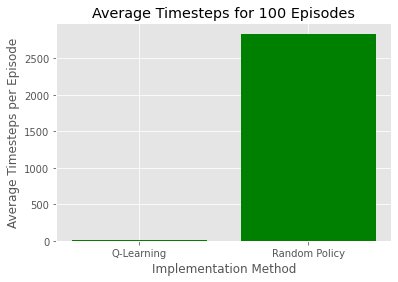

In [13]:
#plot the avg timesteps for q-learning and random policy
plt.style.use('ggplot')

x = ['Q-Learning','Random Policy']
avg_timesteps = [q_avg_time, rand_avg_time]

plt.bar(x, avg_timesteps, color='green')
plt.xlabel("Implementation Method")
plt.ylabel("Average Timesteps per Episode")
plt.title("Average Timesteps for 100 Episodes")


plt.show()

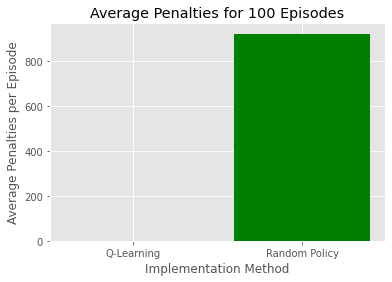

In [14]:
#plot the avg penalties for q-learning and random policy
plt.style.use('ggplot')

x = ['Q-Learning','Random Policy']
avg_pen = [q_avg_pen, rand_avg_pen]

plt.bar(x, avg_pen, color='green')
plt.xlabel("Implementation Method")
plt.ylabel("Average Penalties per Episode")
plt.title("Average Penalties for 100 Episodes")


plt.show()

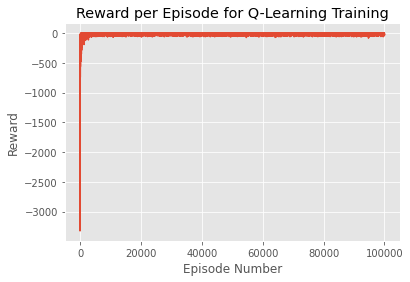

In [23]:
#plot the reward for each training episode -  q-learning
plt.plot(q_ep_reward_list)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Q-Learning Training")
plt.show()

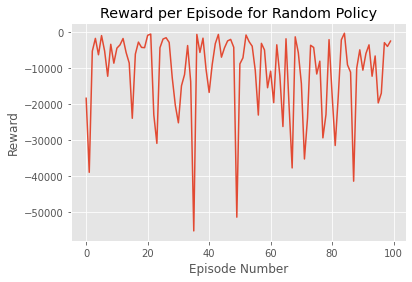

In [22]:
#plot the reward for each episode - random policy
plt.plot(rand_ep_reward_list)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Random Policy")
plt.show()

# Calculating Percentage Performance Difference

In [10]:
perc_dif = ((rand_avg_time-q_avg_time)/rand_avg_time)*100
print("Q-Learning performed {}% better than Random Policy".format(round(perc_dif,2)))

NameError: name 'rand_avg_time' is not defined